# Chapter 3: Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

##  Initialize

In [3]:
# loading data
train = pd.read_csv('Dataset/mnist_train.csv')
train = train.iloc[:, 1:]
train = train.values

test = pd.read_csv('Dataset/mnist_test.csv')
test = test.iloc[:, 1:]
test = test.values

y_train = pd.read_csv('Dataset/mnist_train.csv').iloc[:, 0]
y_train = y_train.values

y_test = pd.read_csv('Dataset/mnist_test.csv').iloc[:, 0]
y_test = y_test.values

X, y = np.vstack([train, test]), np.vstack([y_train.reshape(-1, 1), y_test.reshape(-1, 1)]).reshape(-1)

In [5]:
from sklearn.model_selection import train_test_split
# split the data to test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

---

## Error Analysis

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [12]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5028,    2,   21,   10,   12,   34,   35,    9,   34,    3],
       [   1, 5672,   39,   20,    3,   33,    6,    8,  113,   11],
       [  51,   30, 4640,   86,   76,   21,   85,   50,  148,   17],
       [  42,   31,  109, 4730,    5,  187,   33,   47,  111,   83],
       [  17,   23,   36,   10, 4713,    4,   51,   28,   79,  187],
       [  72,   32,   27,  176,   59, 4006,   96,   30,  144,   78],
       [  25,   16,   40,    2,   36,   81, 4918,    5,   42,    1],
       [  21,   26,   68,   29,   49,    6,    3, 5043,   12,  199],
       [  53,  126,   63,  128,   14,  154,   52,   25, 4370,  127],
       [  39,   29,   22,   72,  130,   33,    1,  172,   68, 4656]],
      dtype=int64)

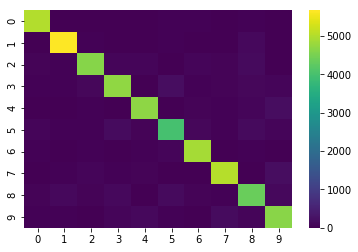

In [13]:
sns.heatmap(conf_mx, cmap='viridis')

Let’s focus the plot on the errors. First, you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare error
rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):

In [14]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [16]:
norm_conf_mx = conf_mx / row_sums

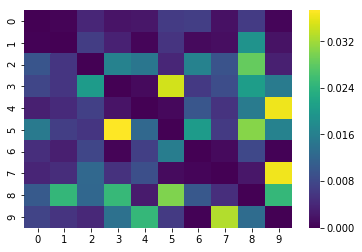

In [20]:
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx, cmap='viridis');

The columns for
classes 8 and 9 are quite bright, which tells you that many images get misclassified as
8s or 9s. Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s
and 9s are often confused with other digits. Conversely, some rows are pretty dark,
such as row 1: this means that most 1s are classified correctly (a few are confused
with 8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for
example, there are more 5s misclassified as 8s than the reverse.

---

## Multilabel Classification

Such a classification system that outputs multiple binary labels is called a mutlilabel classification system.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [24]:
knn_clf = KNeighborsClassifier().fit(X_train, y_multilabel)

KNeighborsClassifier supports multilabel classification, but not all classifiers do.

In [25]:
some_digit = X[21]

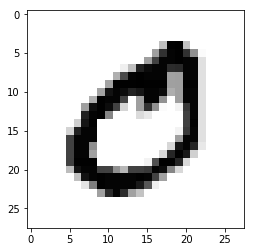

In [27]:
plt.imshow(some_digit.reshape(28, 28), cmap='binary')

In [28]:
knn_clf.predict([some_digit])

array([[False, False]])

It means it is not large (not 7, 8, or 9) and not odd.

In [ ]:
# from sklearn.model_selection import cross_val_predict

---

## Multioutput Classification

To illustrate this, let’s build a system that removes noise from images. It will take as
input a noisy digit image, and it will (hopefully) output a clean digit image, represented
as an array of pixel intensities, just like the MNIST images. Notice that the
classifier’s output is multilabel (one label per pixel) and each label can have multiple
values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
classification system.

In [ ]:
# noise = rnd.randint(0, 100, (len(X_train), 784))
# noise = rnd.randint(0, 100, (len(X_test), 784))
# X_train_mod = X_train + noise
# X_test_mod = X_test + noise
# y_train_mod = X_train
# y_test_mod = X_test